### Stochastic Gradient Descent for Linear Regression

- Essential for machine learning optimisation
- good when dealing with larger datasets, in terms of efficiency and scalability (can also introduce noise and less stability)

Update Rule

$$\theta = \theta - \eta \nabla_{\theta} J(\theta ; x_i, y_i)$$

In the case of simple linear regression, this becomes

$$\theta_{new} = \theta_{old} - \eta \left( \frac{1}{m} X^T (X\theta - y) \right)$$

- $x_i$ - features of the i-th training example
- $y_i$ - target of the i-th training example
- $\nabla_{\theta} J(\theta ; x_i, y_i)$ - gradient calculated for a single data point

**Key difference between regular GD:** the parameter updates are made based on a single data point, not the entire dataset. The data points are chosen randomly.

Epoch: One complete pass through the dataset

- editor.inlineSuggest.enabled <- allows you to show/hide inline suggestions for code

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Step 1: Generate Data

np.random.seed(42)

X = np.random.rand(100, 1) * 2 # generates 100 random points between 0 and 2
Y = 4 + 3 * X + np.random.rand(100, 1)


Linear model

$$Y = \beta_0 + \beta_1 X + \epsilon$$

The SGD function initialises the model parameters, performs stochastic updates for a specified number of epochs and records the cost at each step.

- $\theta$: parameter vector initialised randomly
- $X_{bias}$: augmented X with a column of ones added for the bias term (intercept)

In each epoch, the data is shuffled and for each mini-batch, the gradient is calculated and the parameters are updated. The cost is calculated as the mean squared error and the history of the cost s recorded to monitor convergence

In [26]:
# Step 2: Define the Stochastic Gradient Descent Function

def sgd(X, Y, learning_rate = 0.1, epochs = 1000, batch_size = 1):
    m = len(X)
    
    # theta will be the parameters that will estimate beta_0 and beta_1
    theta = np.random.randn(2, 1)
    
    # We need to add a column of ones to the X vector so we can multiply with the intercept terms.
    X_bias = np.c_[np.ones((m, 1)), X]
    
    cost_history = []
    
    for epoch in range(epochs):
        
        # we will randomly shuffle the data to do our SGD
        indices = np.random.permutation(m)
        X_shuffled = X_bias[indices]
        Y_shuffled = Y[indices]
        
        # iterate through the batch sizes
        for i in range(0, m, batch_size):
            X_batch = X_shuffled[i: i + batch_size]
            Y_batch = Y_shuffled[i: i + batch_size]
            
            # perform the gradient descent, per randomly shuffled data point
            gradients = 2 / batch_size * \
                X_batch.T.dot(X_batch.dot(theta) - Y_batch)
                
            theta -= learning_rate * gradients
            
        # Calculate the cost using MSE formula
        predictions = X_bias.dot(theta)
        cost = np.mean((predictions - Y) ** 2)
        cost_history.append(cost)
        
        if epoch % 100 == 0:
            print(f"Epoch {epoch}, Cost: {cost}")
            
    return theta, cost_history

Epoch 0, Cost: 0.09021533103908083
Epoch 100, Cost: 0.08497420631528016
Epoch 200, Cost: 0.17393784850464722
Epoch 300, Cost: 0.10202854603317951
Epoch 400, Cost: 0.09221800095109665
Epoch 500, Cost: 0.09122929424457171
Epoch 600, Cost: 0.0901005443170842
Epoch 700, Cost: 0.08949454279110744
Epoch 800, Cost: 0.08999049964263048
Epoch 900, Cost: 0.11429344402365571


Text(0.5, 1.0, 'Cost Function During Training')

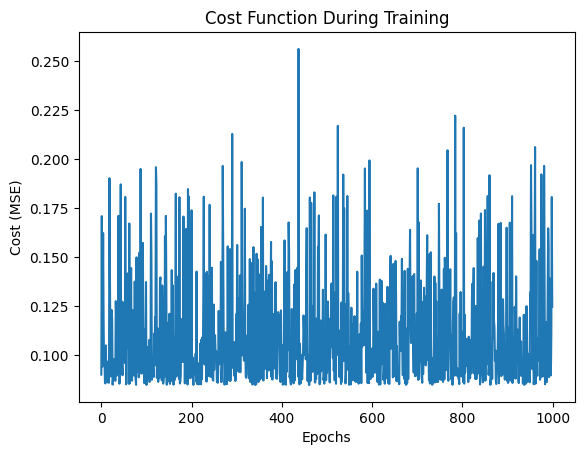

In [28]:
theta_final, cost_history = sgd(X, Y, learning_rate = 0.1, epochs = 1000, batch_size = 1)

X_bias = np.c_[np.ones((len(X), 1)), X]


plt.plot(cost_history)
plt.xlabel("Epochs")
plt.ylabel("Cost (MSE)")
plt.title("Cost Function During Training")

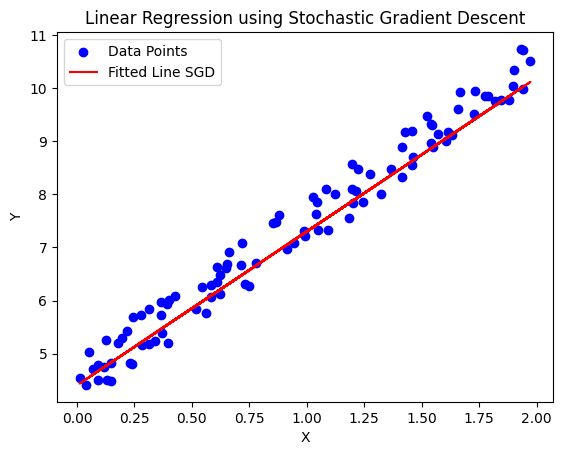

In [31]:
# Plot the fitted line

plt.scatter(X, Y, color='blue', label='Data Points')
plt.plot(X, X_bias.dot(theta_final), color='red', label='Fitted Line SGD')
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Linear Regression using Stochastic Gradient Descent")
plt.legend()
plt.show()

In [32]:
# print optimised parameters
print(f"Final Parameters (theta): {theta_final}")

Final Parameters (theta): [[4.40658441]
 [2.89279298]]
